## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year
0,0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,...,Unknown,2.0,2.0,100.000000,0.000000,100.0,Private,24,10,1948
1,1,CA,United States,Destroyed,Piper,Pa24-180,1.0,Reciprocating,Personal,4.0,...,Unknown,4.0,4.0,100.000000,0.000000,100.0,Private,19,7,1962
2,2,VA,United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,...,Instrumental Meteorological Conditions,3.0,3.0,100.000000,0.000000,100.0,Private,30,8,1974
3,3,CA,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,...,Instrumental Meteorological Conditions,2.0,2.0,100.000000,0.000000,100.0,Private,19,6,1977
4,4,MA,United States,Substantial,Mcdonnel Douglas,Dc9,2.0,Turbo Fan,Unknown,0.0,...,Visual Meteorological Conditions,45.0,1.0,2.222222,97.777778,0.0,Private,17,9,1979


## Visualize KPIs

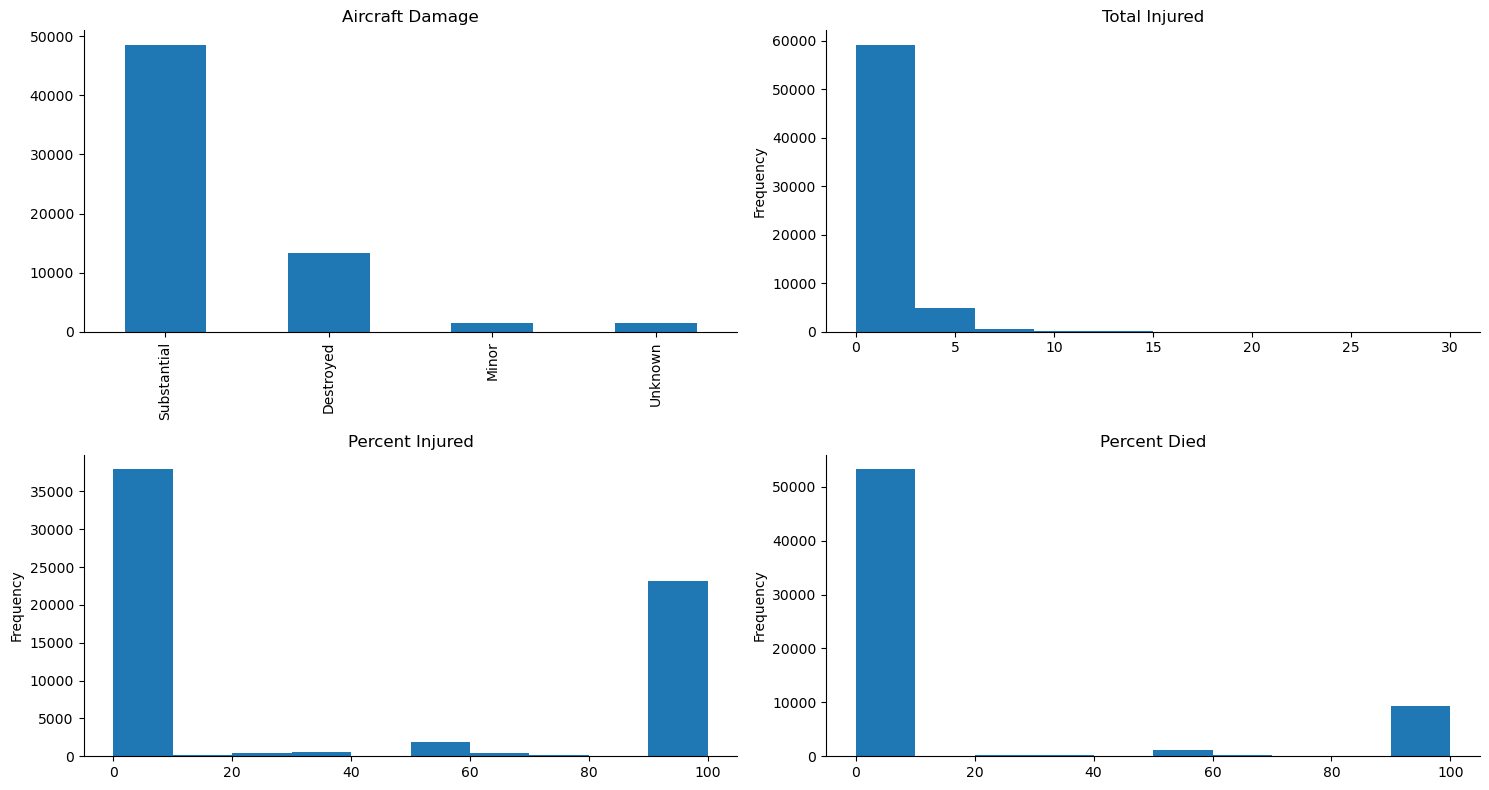

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
#popular_makes = df['Make'].value_counts()
#popular_makes = list(popular_makes[popular_makes > 100].index)
popular_makes = list(df['Make'].value_counts().index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Grumman', 'Bellanca', 'Hughes', 'Air Tractor', 'Aeronca', 'Schweizer', 'Maule', 'Mcdonnel Douglas', 'Champion', 'Stinson', 'Cirrus', 'Luscombe', 'Aero Commander', 'Taylorcraft', 'De Havilland', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Airbus', 'Enstrom', 'Grumman American', 'Ayres', 'Embraer', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Fairchild', 'Lake', 'Waco', 'Mitsubishi', 'Aviat', 'Bombardier', 'GrummanSchweizer', 'Socata', 'Ryan', 'Helio', 'Learjet', 'Schleicher', 'Dehavilland', 'Globe', 'Weatherly', 'Wsk Pzl Mielec', 'Lockheed']


## Damage Index

In [6]:
pop_means_df = df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [7]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.203264,1348.0,77.379048,13.644691,4.119794,1.000000,1.203264
Airbus,0.810127,316.0,70.359984,10.019763,4.903370,1.576007,1.276765
Mcdonnel Douglas,1.700000,540.0,73.004829,24.958134,10.389357,1.308093,2.223758
Bombardier,1.125926,135.0,84.815479,4.814151,2.207407,2.001240,2.253248
Cessna,2.340179,26101.0,64.282062,35.599169,14.184457,1.000000,2.340179
Piper,2.423814,14353.0,58.750565,41.165828,18.580916,1.000000,2.423814
Bell,2.431056,2415.0,52.612850,47.014479,14.632809,1.000000,2.431056
Bellanca,2.434570,1024.0,55.102539,44.897461,18.953451,1.000000,2.434570
Embraer,1.360825,194.0,77.153504,18.722785,11.547762,1.819949,2.476631
Grumman,2.479547,1149.0,66.232287,33.767713,9.495173,1.000000,2.479547


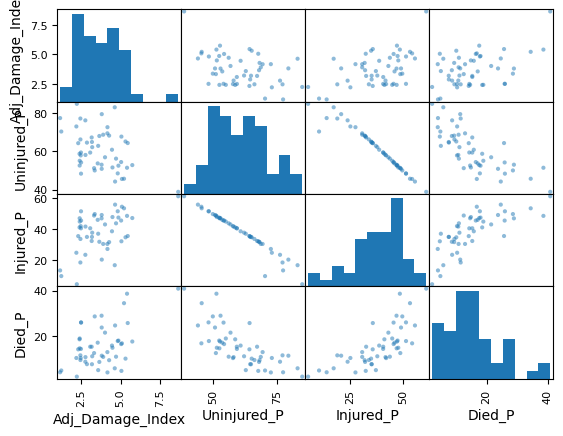

In [8]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [9]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')
di_df

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.203264,1348.0,77.379048,13.644691,4.119794,1.000000,1.203264
Airbus,0.810127,316.0,70.359984,10.019763,4.903370,1.576007,1.276765
Mcdonnel Douglas,1.700000,540.0,73.004829,24.958134,10.389357,1.308093,2.223758
Bombardier,1.125926,135.0,84.815479,4.814151,2.207407,2.001240,2.253248
Cessna,2.340179,26101.0,64.282062,35.599169,14.184457,1.000000,2.340179
Piper,2.423814,14353.0,58.750565,41.165828,18.580916,1.000000,2.423814
Bell,2.431056,2415.0,52.612850,47.014479,14.632809,1.000000,2.431056
Bellanca,2.434570,1024.0,55.102539,44.897461,18.953451,1.000000,2.434570
Embraer,1.360825,194.0,77.153504,18.722785,11.547762,1.819949,2.476631
Grumman,2.479547,1149.0,66.232287,33.767713,9.495173,1.000000,2.479547


In [10]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Percent.Injured'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [11]:
d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
result_d = {}
for key in all_keys:
    denominator = df['Model'].value_counts().to_dict().get(key, 1)
       
    if denominator != 0:
        result_d[key] = r_d[key] / denominator
    else:
        result_d[key] = 0 

In [12]:
model_performance = pd.Series(result_d)

model_performance

502         0.666667
At-602      0.760000
T182Rg      0.200000
B-24-R      0.500000
47G2A       0.200000
              ...   
Tu206       0.550000
At-6 D      1.000000
M7          0.833333
A319-131    0.333333
C310R       1.000000
Length: 3122, dtype: float64

In [13]:
model_vc = df['Model'].value_counts()

In [14]:
model_performance.isna().sum()

0

In [15]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents':model_vc}, axis=1)
model_pwdc.sort_values(by='Amount of incidents',ascending=False)

,Performance,Amount of incidents
152,0.468723,2334
172,0.593128,1659
172N,0.561788,1141
Pa-28-140,0.473106,911
150,0.463263,803
...,...,...
65 Lb,1.000000,1
Swift Gcib,1.000000,1
H-19/S55,1.000000,1
Ce-172M,1.000000,1


In [16]:
model_pwdc = model_pwdc.fillna(0)
#model_pwdc = model_pwdc.loc[model_pwdc['Amount of incidents'] >= 20]
model_pwdc.sort_values(by='Performance')

In [20]:
di_df

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.203264,1348.0,77.379048,13.644691,4.119794,1.000000,1.203264
Airbus,0.810127,316.0,70.359984,10.019763,4.903370,1.576007,1.276765
Mcdonnel Douglas,1.700000,540.0,73.004829,24.958134,10.389357,1.308093,2.223758
Bombardier,1.125926,135.0,84.815479,4.814151,2.207407,2.001240,2.253248
Cessna,2.340179,26101.0,64.282062,35.599169,14.184457,1.000000,2.340179
Piper,2.423814,14353.0,58.750565,41.165828,18.580916,1.000000,2.423814
Bell,2.431056,2415.0,52.612850,47.014479,14.632809,1.000000,2.431056
Bellanca,2.434570,1024.0,55.102539,44.897461,18.953451,1.000000,2.434570
Embraer,1.360825,194.0,77.153504,18.722785,11.547762,1.819949,2.476631
Grumman,2.479547,1149.0,66.232287,33.767713,9.495173,1.000000,2.479547


In [22]:
joint = df.join(model_pwdc, how='outer',on='Model')
joint2 = joint.join(di_df, how='outer', on='Make')
joint2

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Event.Year,Performance,Amount of incidents,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
0,0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,...,1948,0.649485,97,2.263761,436.0,64.908257,35.091743,7.645260,1.415057,3.203350
1084,1084,KY,United States,Substantial,Stinson,108-3,1.0,Reciprocating,Personal,0.0,...,1982,0.649485,97,2.263761,436.0,64.908257,35.091743,7.645260,1.415057,3.203350
1438,1438,WA,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,0.0,...,1982,0.649485,97,2.263761,436.0,64.908257,35.091743,7.645260,1.415057,3.203350
2767,2767,WA,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,...,1982,0.649485,97,2.263761,436.0,64.908257,35.091743,7.645260,1.415057,3.203350
3985,3985,WY,United States,Substantial,Stinson,108-3,1.0,Reciprocating,Personal,0.0,...,1983,0.649485,97,2.263761,436.0,64.908257,35.091743,7.645260,1.415057,3.203350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60697,60697,Unknown/Foreign Location,Foreign Country,Minor,Cirrus,Sf50,1.0,Turbo Fan,Ferry,0.0,...,2018,1.000000,5,2.338200,411.0,50.048662,49.708029,28.629359,1.444581,3.377719
61329,61329,Unknown/Foreign Location,Foreign Country,Minor,Cirrus,Sf50,1.0,Turbo Jet,Unknown,0.0,...,2018,1.000000,5,2.338200,411.0,50.048662,49.708029,28.629359,1.444581,3.377719
63711,63711,MI,United States,Destroyed,Cirrus,Sf50,1.0,Unknown,Business,0.0,...,2021,1.000000,5,2.338200,411.0,50.048662,49.708029,28.629359,1.444581,3.377719
64608,64608,FL,United States,Substantial,Cirrus,Sf50,1.0,Unknown,Business,0.0,...,2022,1.000000,5,2.338200,411.0,50.048662,49.708029,28.629359,1.444581,3.377719


In [25]:
joint2.shape

(64781, 32)

In [26]:
di_df.shape

(50, 7)

In [27]:
joint2.isna().sum()

index                     0
Location                  0
Country                   0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Total.Passengers          0
Total.Injured             0
Percent.Injured           0
Percent.Uninjured         0
Percent.Died              0
Airplane.Type             0
Event.Day                 0
Event.Month               0
Event.Year                0
Performance               0
Amount of incidents       0
Damage_Index              0
Num_Incidents             0
Uninjured_P               0
Injured_P                 0
Died_P                    0
Penalty                   0
Adj_Damage_Index          0
dtype: int64

In [28]:
52689-27379

25310

In [29]:
#joint.to_csv('priv_analyzed.csv')